In this notebook, we will learn how to analyze pmosition data from a given sub-region of your environment. In particular, this example deals with a mouse running on the radial arm maze, but the idea can be generalized to the analysis of a given sub-region of any environment. 


Let's get right into it! First, import the necessary libraries.

In [1]:
import pynapple as nap

import numpy as np
import pandas as pd
import scipy.io
import os, sys
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import *


Next, load the data from your directory. My data is being read from an h5 file, but this can be replaced to read whatever format you are working with (csv, MAT file etc).

In [2]:
data_directory = '/media/DataDhruv/Recordings/unimplanted/211231'
tracking_data =  pd.read_hdf(data_directory + '/' + '1637-211231_3.h5', mode = 'r')

tracking_data

    

scorer    DLC_mobnet_100_unimplantedJan4shuffle1_200000                        \
bodyparts                                          nose                         
coords                                                x          y likelihood   
0                                            324.503784  84.962143   0.026416   
1                                            328.924713  93.850739   0.001578   
2                                            325.112549  87.354752   0.007941   
3                                            324.465240  85.653740   0.019858   
4                                            325.845581  85.645416   0.004245   
...                                                 ...        ...        ...   
146201                                       324.558075  85.519676   0.011337   
146202                                       324.929230  87.742287   0.010971   
146203                                       330.673004  93.019180   0.061323   
146204                                       324.914368  85.998718   0.016857   
146205                                       324.977417  85.712440   0.006440   

scorer                                                                \
bodyparts     leftear                           rightear               
coords              x           y likelihood           x           y   
0          326.843628   90.024574   0.003745  381.853790  158.946304   
1           78.792007  872.076172   0.001669  381.974884  158.478287   
2          329.019196   92.795250   0.002605  382.148254  157.459488   
3          327.157867   90.317627   0.004959  382.320770  158.991562   
4          994.155090  576.599915   0.033926  987.756836  571.420776   
...               ...         ...        ...         ...         ...   
146201     328.169495   91.390404   0.007067  385.295135  158.341278   
146202     328.647644   92.054283   0.006341  382.822784  158.544571   
146203     329.564850   93.882935   0.029956  386.001648  159.167816   
146204     327.542847   91.617088   0.007448  384.997955  157.455170   
146205     415.963928  190.382660   0.003567  384.394562  158.409790   

scorer                
bodyparts             
coords    likelihood  
0           0.004299  
1           0.008544  
2           0.016695  
3           0.009707  
4           0.013376  
...              ...  
146201      0.086997  
146202      0.015470  
146203      0.055731  
146204      0.003700  
146205      0.049589  

[146206 rows x 9 columns]

Here, we see that tracking_data has 9 columns. Namely, the x and y positions of the 3 bodyparts I labelled (nose, left ear and right ear), as well as the likelihood. We are only interested in the x and y positions, so we will extract these, and create a new DataFrame, with just the relevant data.

In [3]:
hd_cols = [0,1,3,4,6,7]
hd_data = tracking_data.iloc[:,hd_cols]

hd_data

scorer    DLC_mobnet_100_unimplantedJan4shuffle1_200000             \
bodyparts                                          nose              
coords                                                x          y   
0                                            324.503784  84.962143   
1                                            328.924713  93.850739   
2                                            325.112549  87.354752   
3                                            324.465240  85.653740   
4                                            325.845581  85.645416   
...                                                 ...        ...   
146201                                       324.558075  85.519676   
146202                                       324.929230  87.742287   
146203                                       330.673004  93.019180   
146204                                       324.914368  85.998718   
146205                                       324.977417  85.712440   

scorer                                                     
bodyparts     leftear                rightear              
coords              x           y           x           y  
0          326.843628   90.024574  381.853790  158.946304  
1           78.792007  872.076172  381.974884  158.478287  
2          329.019196   92.795250  382.148254  157.459488  
3          327.157867   90.317627  382.320770  158.991562  
4          994.155090  576.599915  987.756836  571.420776  
...               ...         ...         ...         ...  
146201     328.169495   91.390404  385.295135  158.341278  
146202     328.647644   92.054283  382.822784  158.544571  
146203     329.564850   93.882935  386.001648  159.167816  
146204     327.542847   91.617088  384.997955  157.455170  
146205     415.963928  190.382660  384.394562  158.409790  

[146206 rows x 6 columns]

Now, from this data shall compute the centroid of these 3 body parts. This will result in a proxy for head position.
The centroid or geometric center is the arithmetic mean position of all the points (in our case, the ears and the nose).

First, we select the columns containing the x-and y-coordinates of all parts. We will store these in x_cols and y_cols, respectively. Then create a new DataFrame with just the x-coordinate and y-coordinates, which we call "all_x_coords" and "all_y_coords" respectively. 

In [4]:
x_cols = [0,2,4]
y_cols = [1,3,5]
all_x_coords = hd_data.iloc[:,x_cols]
all_y_coords = hd_data.iloc[:,y_cols]
all_x_coords

scorer    DLC_mobnet_100_unimplantedJan4shuffle1_200000              \
bodyparts                                          nose     leftear   
coords                                                x           x   
0                                            324.503784  326.843628   
1                                            328.924713   78.792007   
2                                            325.112549  329.019196   
3                                            324.465240  327.157867   
4                                            325.845581  994.155090   
...                                                 ...         ...   
146201                                       324.558075  328.169495   
146202                                       324.929230  328.647644   
146203                                       330.673004  329.564850   
146204                                       324.914368  327.542847   
146205                                       324.977417  415.963928   

scorer                 
bodyparts    rightear  
coords              x  
0          381.853790  
1          381.974884  
2          382.148254  
3          382.320770  
4          987.756836  
...               ...  
146201     385.295135  
146202     382.822784  
146203     386.001648  
146204     384.997955  
146205     384.394562  

[146206 rows x 3 columns]

Wonderful! Now to compute the centroid. Remember, it is a mean. Therefore, we need the sum of the observations for each time point. We compute the sums for each coordinate separately, below:  

In [5]:
x_sum = all_x_coords.sum(axis = 1)
y_sum = all_y_coords.sum(axis = 1)

x_sum

0         1033.201202
1          789.691605
2         1036.279999
3         1033.943878
4         2307.757507
             ...     
146201    1038.022705
146202    1036.399658
146203    1046.239502
146204    1037.455170
146205    1125.335907
Length: 146206, dtype: float64

Now, we need to divide the sum by the number of body parts. In our case this is 3, but we will express this in more general terms so that we do not hard-code our variables. Remember, it is good practice to write the most generalizable code. 

In [6]:
length = all_x_coords.iloc[0,:].shape[0]

Now, we will compute the centroid, and store it in a DataFrame called hd_centroid. From here, we will extract the X and Y positions of the head, stored in the variables x and y, respectively.

In [7]:
x_cent = x_sum/length
y_cent = y_sum/length

hd_centroid = np.zeros((len(x_cent),2))
hd_centroid[:,0] = x_cent 
hd_centroid[:,1] = y_cent

x = hd_centroid[:,0]
y = hd_centroid[:,1]


Now, let us create a DataFrame for position. Time to use Pynapple! This recording was acquired at 120Hz, so we will make the timestamps first, as below: 

In [8]:
fs = 120
timestamps = x_cent.index.values/fs
    

Now, we create the position DataFrame as below: 

In [9]:
position = np.vstack([x, y]).T
position = nap.TsdFrame(t = timestamps, d = position, columns = ['x', 'y'], time_units = 's')

position


,x,y
Time (s),,
0.000000,344.400401,111.311007
0.008333,263.230535,374.801732
0.016667,345.426666,112.536496
0.025000,344.647959,111.654310
0.033333,769.252502,411.222036
...,...,...
1218.341667,346.007568,111.750453
1218.350000,345.466553,112.780380
1218.358333,348.746501,115.356644


This looks good, but does not give us an idea of what the data really represents. Let's plot this

<AxesSubplot:>

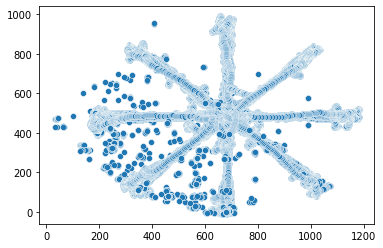

In [10]:
sns.scatterplot(data = position, x = x, y = y)

Aha! What we said before is now evident. The position plot reveals the radial arm maze outline. There are some points outside the bounds of the mze, due to DeepLabCut detecting the mouse erroneously. But these point are irrelevant to us, since we only care about points in the centre of the maze. Now, I will define the centre point of the maze, using the coordinates (xth, yth) and a radius of the circle given by rth.

(xth, yth) are approximate values for the centre of this maze. Feel free to pick these values as per your convenience and application. rth is also modifiable as per your application.

We will go with the following parameter values:

In [11]:
xth = 683.4
yth = 484.4
rth = 200

Let us visualize this; we will plot the position with the circle around it. And then we will only consider those trajectories that lie within the circle.

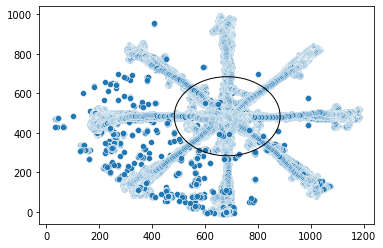

In [12]:
circle1 = plt.Circle((xth, yth), rth, color='k', fill = False)
ax = sns.scatterplot(data = position, x = x, y = y)
ax.add_patch(circle1)

Great! So now we can restrict our position data to the centre of the maze. 

So, to do this, firstly, we will restrict our position to points within the centre. This can be done by selecting points whose distance from the centre is smaller than the radius of our circle. Time to put Pynapple to use!

In [13]:
d = np.sqrt((x - xth)**2 + (y - yth)**2)
dist_center = nap.Tsd(t = timestamps, d = d, time_units = 's')

dist_center

Time (s)
0.000000       504.099320
0.008333       434.228235
0.016667       502.502179
0.025000       503.678761
0.033333       112.808096
                  ...    
1218.341667    502.694080
1218.350000    502.294890
1218.358333    498.182661
1218.366667    502.865633
1218.375000    458.634848
Length: 146206, dtype: float64

Pynapple time!

In [16]:
within_center = dist_center.threshold(rth, 'below')
ep = within_center.time_support

within_center

Time (s)
0.033333       112.808096
0.241667       111.840542
0.408333       112.876936
0.566667       114.982099
0.591667       112.613405
                  ...    
1215.033333    112.091947
1215.166667    196.402651
1215.191667     95.696973
1215.591667    112.072994
1216.241667    110.800920
Length: 40298, dtype: float64

As you can see, all values in within_center are now less than our threshold value (rth). 

What does the time support of this look like?

In [19]:
print(ep)

           start          end
0       6.354166    13.087500
1      21.037500    35.754166
2      39.112500    50.070834
3      58.004166    63.720834
4      74.437500    76.504166
..           ...          ...
122  1185.837500  1187.370834
123  1190.195834  1191.662500
124  1193.479166  1194.620834
125  1195.587500  1197.129166
126  1207.512500  1209.729166

[127 rows x 2 columns]


So now we have a set of points for when the animal is within the radius of the maze. We will now seaparate these points into trials. For our purposes, we will say that trials that are only greater than 0.7s be considered. Additionally, each trial can have a maximal duration of 20s. 

In [18]:
ep = ep.drop_short_intervals(0.7, time_units = 's')

ep

,start,end
0,6.354166,13.087500
1,21.037500,35.754166
2,39.112500,50.070834
3,58.004166,63.720834
4,74.437500,76.504166
...,...,...
5,1185.837500,1187.370834
6,1190.195834,1191.662500
7,1193.479166,1194.620834
8,1195.587500,1197.129166


In [ ]:
ep = ep.drop_long_intervals(20, time_units = 's')
ep = ep.reset_index(drop=True)
ep

In [ ]:
   
    

    
    
    
    
       
    
    
    
    
    
    
    
    
    ep = ep.drop_short_intervals(0.7, time_units = 's')
    
    dy = nap.Tsd(t = timestamps, d = y-yth, time_units = 's')    
    
    
    ## COMMENT OUT FOR RANDOM EXPLORATION
##########################################################################    
    diffy = []
    for i in ep.index.values:
        tmp = dy.restrict(ep.loc[[i]])
        diffy.append(tmp.iloc[-1] - tmp.iloc[0])
    diffy = pd.Series(data = diffy)
    diffy = diffy[diffy > rth/2]
    
    ep = ep.loc[diffy.index]
###########################################################################    
    # plt.figure()
    # plt.plot(dy.restrict(ep), 'o')
    
    circle1 = plt.Circle((xth, yth), rth, color='k', fill = False)
    
    plt.figure()
    plt.plot(position['x'].restrict(ep),position['y'].restrict(ep),'silver', zorder = 1)
    plt.scatter(position['x'].restrict(ep), position['y'].restrict(ep), zorder = 2)
    # plt.scatter(position['x'].restrict(rev), position['z'].restrict(rev), zorder = 2)
    plt.gca().add_patch(circle1)
        
    # position.as_units('s').to_csv(data_directory + '/' + name + '_posMATLAB.csv', index=True)
    # ep.as_units('s').to_csv(data_directory + '/' + name + '_fwd.csv', index=False)
    
    
    